In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
plt.style.use('ggplot')

x = np.linspace(0, 10, 100)
y_hat = x*5+5

np.random.seed(42)

y = x*5 + 20*(np.random.rand(x.size) - 0.5) + 5

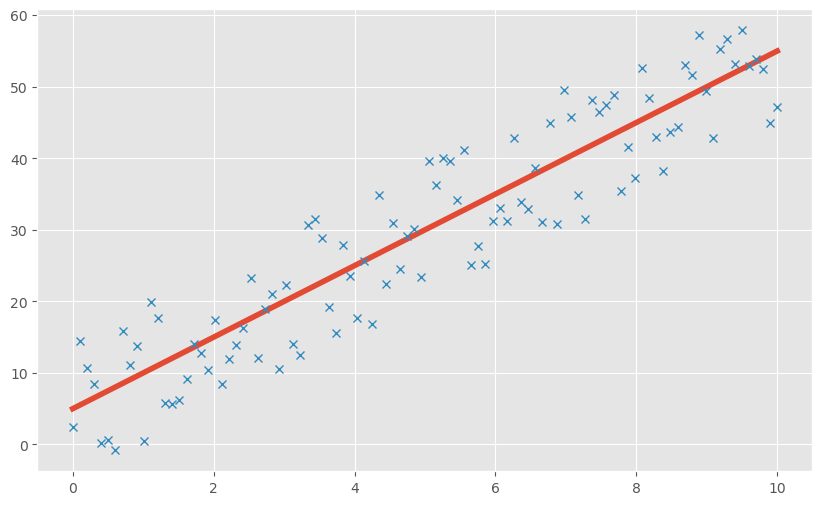

In [3]:
plt.figure(figsize=(10, 6))

plt.plot(x, y_hat, linewidth=4)
plt.plot(x, y, 'x')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=42)

In [5]:
x_test, y_test

(array([8.38383838, 5.35353535, 7.07070707, 4.54545455, 4.44444444,
        3.93939394, 2.22222222, 8.08080808, 1.01010101, 0.        ,
        1.81818182, 3.03030303, 7.37373737, 3.33333333, 9.09090909,
        0.4040404 , 7.67676768, 7.77777778, 1.21212121, 3.13131313,
        5.55555556, 8.88888889, 2.62626263, 4.24242424, 6.96969697,
        1.51515152, 4.04040404, 9.6969697 , 0.90909091, 7.27272727]),
 array([38.19035892, 39.66422378, 45.79843074, 30.97771841, 22.39782185,
        23.50001957, 11.95400408, 52.66610892,  0.46219494,  2.49080238,
        12.72980946, 22.30241219, 48.17791544, 30.64437741, 42.84643037,
         0.14057483, 48.80924532, 35.36978192, 17.70945888, 14.06704813,
        41.21526248, 57.1886993 , 12.12478877, 16.89989163, 49.58622358,
         6.24384777, 17.6427849 , 53.93950507, 13.7069061 , 31.47407871]))

In [9]:
Options = [cv2.DIST_L2, cv2.DIST_L1, cv2.DIST_L12, cv2.DIST_FAIR, cv2.DIST_WELSCH, cv2.DIST_HUBER]
Lables = ['DIST_L2', 'DIST_L1', 'DIST_L12', 'DIST_FAIR', 'DIST_WELSCH', 'DIST_HUBER']
colors = ['g','c','m','y','k','b']
points = np.array([(xi, yi) for xi,yi in zip(x_train, y_train)])

In [10]:
linreg = linear_model.LinearRegression()
linreg.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [19]:
y_sklearn = linreg.predict(x.reshape(-1, 1))
y_sklearn = list(y_sklearn.reshape(1, -1)[0])


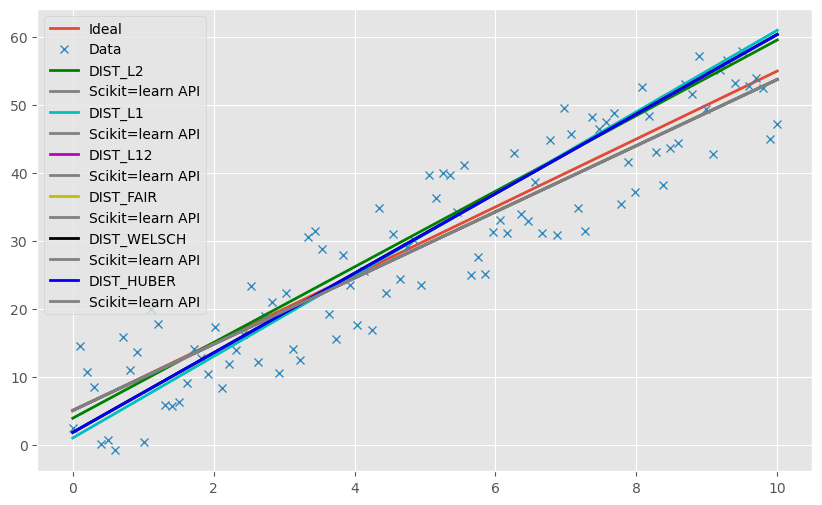

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_hat, linewidth=2, label='Ideal')
plt.plot(x, y, 'x', label='Data')
for i in range(len(colors)):
    tpe = Options[i]
    lable = Lables[i]
    c = colors[i]
    [vxl, vyl, xl, yl] = cv2.fitLine(np.array(points, dtype=np.int32), tpe, 0, 0.01, 0.01)
    y_cv = [vyl[0]/vxl[0] * (xi - xl[0]) + yl[0] for xi in x]
    plt.plot(x, y_cv, c=c, linewidth=2, label=lable)
    plt.plot(x, list(y_sklearn), c='0.5', linewidth=2, label='Scikit=learn API')
    plt.legend(loc='upper left')

# regeression

ما از رگرسیون جهت پیش بینی مقادیر پیوسته استفاده میکنیم مثه قیمت یک کالا یا سهام بورس و ... رگرسیون خطی ساده ترین توع آن است